In [13]:
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

In [43]:
import simfin as sf
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from simfin.names import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

def getData():
    sf.set_api_key('free')

    # Set the local directory where data-files are stored.
    # The dir will be created if it does not already exist.
    sf.set_data_dir('~/simfin_data/')

    # Load daily share-prices for all companies in USA.
    # The data is automatically downloaded if you don't have it already.
    df_prices = sf.load_shareprices(market='us', variant='daily')

    # Plot the closing share-prices for ticker MSFT.
    msft_close_values_TEMP = df_prices.loc['MSFT']

    print(msft_close_values_TEMP.columns)

    list_of_stocks = ['AAPL', 'MSFT', 'CLDR', 'CRM', 'TSLA', 'NVDA', 'DAL']

    big_df = pd.DataFrame()
    for stock in list_of_stocks:
        temp_df = df_prices.loc[stock].tail(100)
        temp_df = temp_df[["SimFinId", "Close", "Open", "High", "Low"]]
        big_df = pd.concat([big_df, temp_df])

    ultimate_df = big_df

    return ultimate_df


def plottingExperiments(df_prices):
    #PLOTTING
    msft_close_values= df_prices.loc['MSFT']
    msft_close_values = msft_close_values[["Close", "Open", "High", "Low"]]
    msft_close_values.plot(grid=True, figsize=(10, 5), title='MSFT Close')

    aapl_close_values = df_prices.loc['AAPL', CLOSE].tail(100)
    aapl_close_values.plot(grid=True, figsize=(10, 5), title='APPL Close')

    print(type(msft_close_values))

    #plt.scatter(x, y)

if __name__ == '__main__':
    data = getData()
    #plottingExperiments()


Dataset "us-shareprices-daily" on disk (0 days old).
- Loading from disk ... Done!
Index(['SimFinId', 'Open', 'Low', 'High', 'Close', 'Adj. Close', 'Dividend',
       'Volume', 'Shares Outstanding'],
      dtype='object')


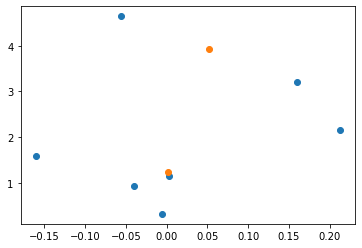

In [48]:
# Set up array for changed data to go into
finishedData = []

# Converts data to np array to make it easier to work with
data = np.array(data)

# Iterates through the number of stocks (change this number when increasing the number of stocks)
for x in range(7):
    # Temp array to work with
    temp = []
    
    # Adds the number of entries per stock to temp array
    # (Change this number if increasing/decrease the number of data points per stock)
    for i in range(100):
        temp.append(data[i + x*100])
    
    # Make into np array 
    temp = np.array(temp)
    
    # Take the mean of all the colemns
    temp = np.mean(temp, axis=0)
    
    # Values to reduce number of features while also keeping the data
    # These varibles hold avg(open) - avg(close) and avg(high) - avg(low)
    openCloseDiff = temp[2] - temp[1] 
    highLowDiff = temp[3] - temp[4]
    
    # Add these points to array that will use Kmeans
    finishedData.append([openCloseDiff, highLowDiff])

# Make into np.array and print for referance (if needed)
finishedData = np.array(finishedData)
#print(finishedData)

# Runs Kmeans on the data with number of cluster=2, can change this when we find ideal number of clusters when finalizing data set
kmeans = KMeans(n_clusters=2).fit(finishedData)

# Finds, converts to np.array and prints centriods 
centroids = kmeans.cluster_centers_
centroids = np.array(centroids)
#print(centroids)

# Places the points on scatter plot, blue points are each stock and orange are the centers
plt.scatter(finishedData[:,0], finishedData[:,1])
plt.scatter(centroids[:,0], centroids[:,1])
    

[[ 7  0  0  1  0  0  0]
 [ 0 13  0  0  0  0  0]
 [ 0  2 11  0  1  0  0]
 [ 2  0  0  7  0  2  0]
 [ 0  0  0  0  9  0  0]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

     56317.0       0.78      0.88      0.82         8
     59265.0       0.87      1.00      0.93        13
     85017.0       1.00      0.79      0.88        14
    111052.0       0.88      0.64      0.74        11
    172199.0       0.90      1.00      0.95         9
    231789.0       0.71      1.00      0.83         5
    890662.0       1.00      1.00      1.00        10

    accuracy                           0.89        70
   macro avg       0.88      0.90      0.88        70
weighted avg       0.90      0.89      0.88        70



Text(0, 0.5, 'Mean Error')

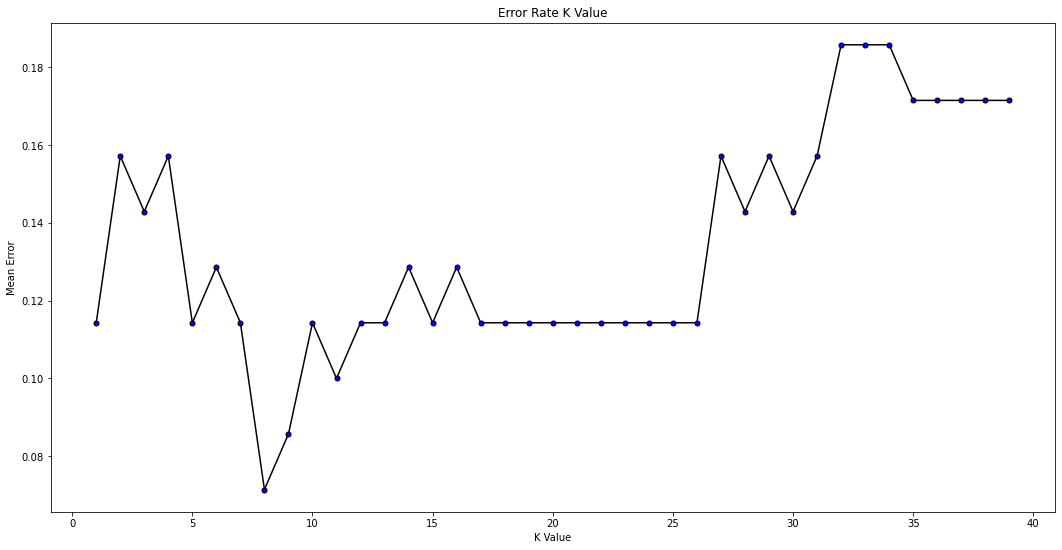

In [49]:
# Gets columns Open, Close, Low and High
X = data[:,1:5]
# Gets the number of the stock 
y = data[:,0]
# Splits up the data, can modify the size and random state to give different test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=2)

# Used to scale the data (uneeded)
"""
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
"""

# Runs KNN
y_pred = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).predict(X_test)

# Displays results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plots the Error
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(18, 9))
plt.plot(range(1, 40), error, color='black', linestyle='solid', marker='.',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
